✅ Saved categorized products with NLP clusters to categorized_nlp_products.csv


C:\Users\Desta\AppData\Local\Temp\ipykernel_4732\1305530505.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Category Cluster", data=df, palette="Set2")


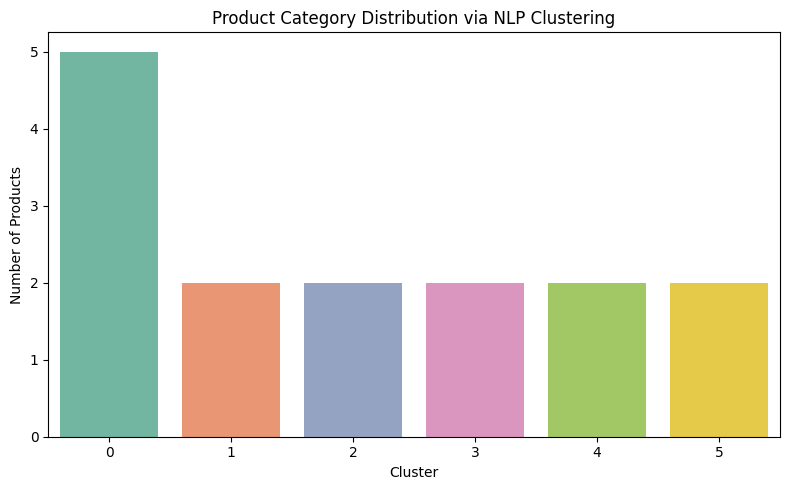

In [ ]:
# 🧠 NLP Clustering for Product Categorization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

#  Step 1: Load the cleaned CSV file
input_file = "C:\\Users\\Desta\\Pictures\\10 academy\\week4\\amharic-ecommerce-ner-vendor-scorecard\\cleaned_vendor_data.csv"  # Replace with your actual file path
  # Replace with your actual path
df = pd.read_csv(input_file)

#  Step 2: Fill missing product names
df["Product Name"] = df["Product Name"].fillna("")

#  Step 3: TF-IDF vectorization of product names
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df["Product Name"])

#  Step 4: KMeans clustering
num_clusters = 6  # Adjust based on your dataset size and diversity
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df["Category Cluster"] = kmeans.fit_predict(X)

#  Step 5: Save the updated file
output_file = "categorized_nlp_products.csv"
df.to_csv(output_file, index=False)
print(f"✅ Saved categorized products with NLP clusters to {output_file}")

#  Step 6: Plot category distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Category Cluster", data=df, palette="Set2")
plt.title("Product Category Distribution via NLP Clustering")
plt.xlabel("Cluster")
plt.ylabel("Number of Products")
plt.tight_layout()
plt.savefig("category_distribution.png")
plt.show()
